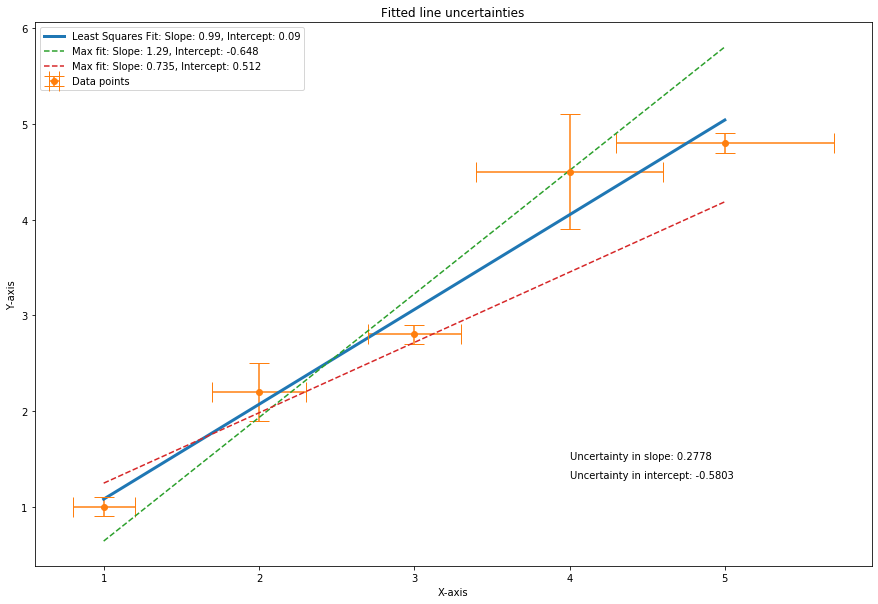

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#get data - but could read this from a csv file

exp_data= {'x':[1, 2,   3,   4,   5],
           'y':[1, 2.2, 2.8, 4.5, 4.8],
           'xerr':[0.2,0.3,0.3,0.6,0.7],
           'yerr':[0.1,0.3,0.1,0.6,0.1]
          }

# add all data to dataframe
df = pd.DataFrame(data=exp_data)  # put data into dataframe

# construct fit and plot original data

plt.figure(figsize=(15,10))  # establish plot size
m, c = np.polyfit(df.x, df.y, 1)  # calcualte gradient and intercept using Numpy
label= "Least Squares Fit: " +"Slope: "+str(round(m,3)) +", Intercept: "+str(round(c,3))
plt.plot(df.x, m*df.x + c,label=label,linewidth=3.0)  # plot 
plt.errorbar(df.x, df.y, yerr=df.yerr, xerr=df.xerr, fmt='o',capsize=10,label="Data points") # plot datapoints with error bars

# setup gradient and intercepts max and min values - getting data from dataframe iloc[-1] = last

m_low= ((df["y"].iloc[-1]-df["yerr"].iloc[-1])-(df["y"].iloc[0]+df["yerr"].iloc[0]))/((df["x"].iloc[-1]+df["xerr"].iloc[-1])-(df.x[0]-df["xerr"].iloc[0]))
d_low=(df["y"].iloc[0]+df["yerr"].iloc[0])-(m_low*(df["x"].iloc[0]-df["xerr"].iloc[0]))
m_high= ((df["y"].iloc[-1]+df["yerr"].iloc[-1])-(df["y"].iloc[0]-df["yerr"].iloc[0]))/((df["x"].iloc[-1]-df["xerr"].iloc[-1])-(df.x[0]+df["xerr"].iloc[0]))
d_high=(df["y"].iloc[0]-df["yerr"].iloc[0])-(m_high*(df["x"].iloc[0]+df["xerr"].iloc[0]))

# calculate errors in gradient and intercept

m_err = ((m_high-m_low)/2)
d_err = ((d_high-d_low)/2)


# plot max fit
label= "Max fit: " +"Slope: "+str(round(m_high,3)) +", Intercept: "+str(round(d_high,3))
plt.plot(df.x,(m_high*df.x)+d_high,label=label,linestyle='dashed')  #high line

#plot min fit
label= "Max fit: " +"Slope: "+str(round(m_low,3)) +", Intercept: "+str(round(d_low,3))
plt.plot(df.x,(m_low*df.x)+d_low,label=label,linestyle='dashed')  #high line

# add some chart details
plt.title('Fitted line uncertainties')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')


#print uncertainty
slope_err = "Uncertainty in slope: " +str(round(m_err,4))
Intercept_err = "Uncertainty in intercept: " +str(round(d_err,4))

plt.text(4,1.5,slope_err)
plt.text(4,1.3,Intercept_err)

plt.legend()
plt.show()

